# CIA Country Analysis and Clustering

### Goal

+ Using K-Means gain insights into similarities between countries and regions of the World
+ Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

In [1]:
# importing the libraries needed for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cia_country_fact.csv') # reading in the cia country facts dataset
df.head(5) # looking at the first five rows of the dataset

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [2]:
# understanding the data landscape - looking for null counts and at the dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [3]:
# looking at some quick statistics of the dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


## Exploratory Data Analysis

<AxesSubplot:xlabel='Population', ylabel='Count'>

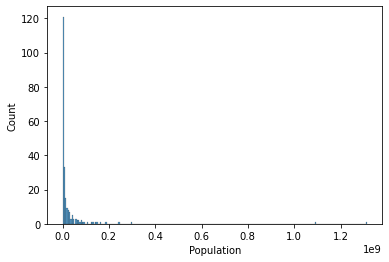

In [4]:
sns.histplot(data = df, x = 'Population')

<AxesSubplot:xlabel='Population', ylabel='Count'>

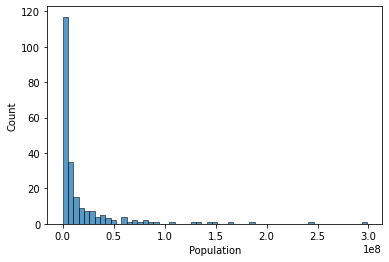

In [5]:
sns.histplot(data = df[df['Population']<500000000], x = 'Population')

#### Creating a bar chart showing the mean GDP per Capita per region

+ The black bar represents standard deviation

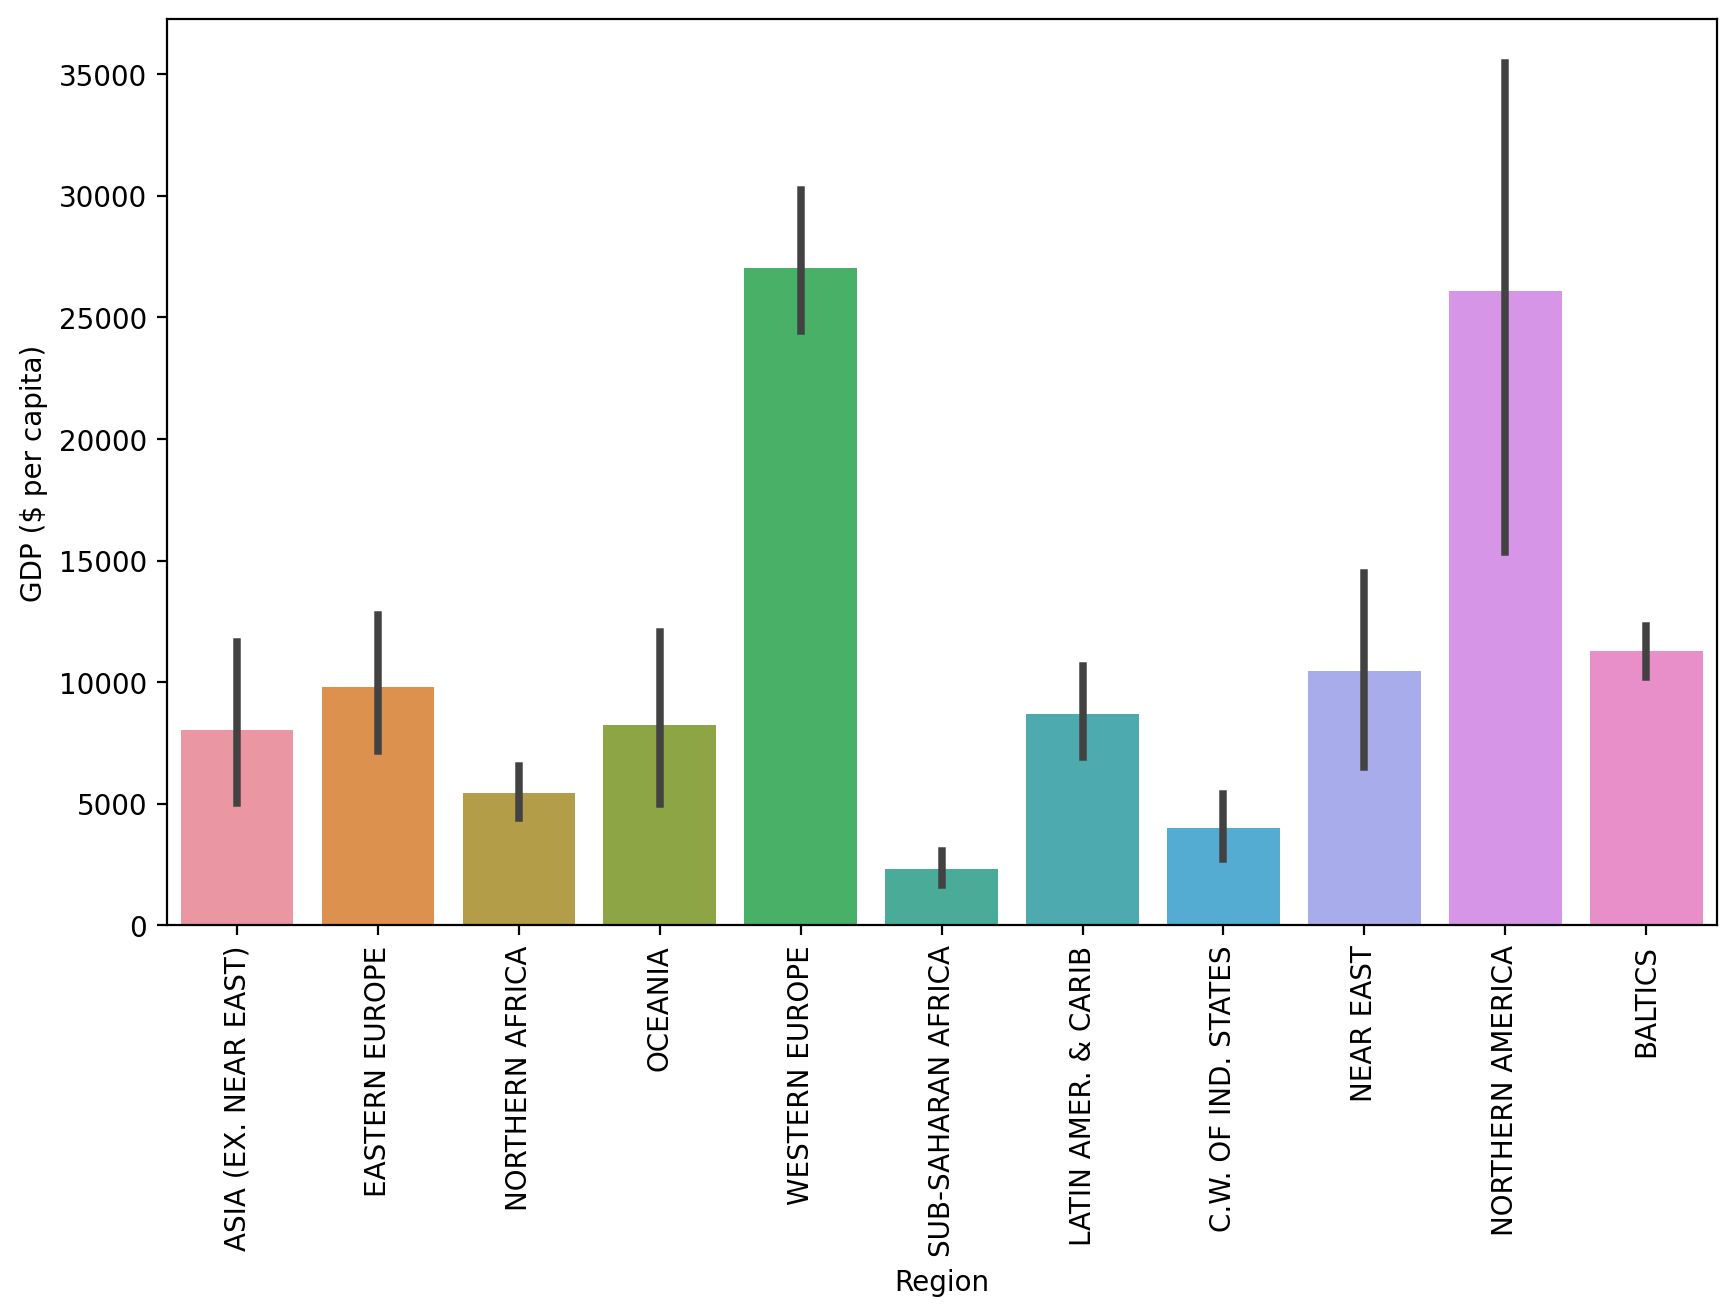

In [6]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

#### Task 1: Creating a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita

+ Coloured by region

#### Task 2: Creating a scatterplot showing the relationship between GDP per Capita and Literacy

+ Coloured by region

#### Conclusions

+ 
+ 
+ 

#### Task 3: Creating a heatmap of the correlation between columns in the DataFrame

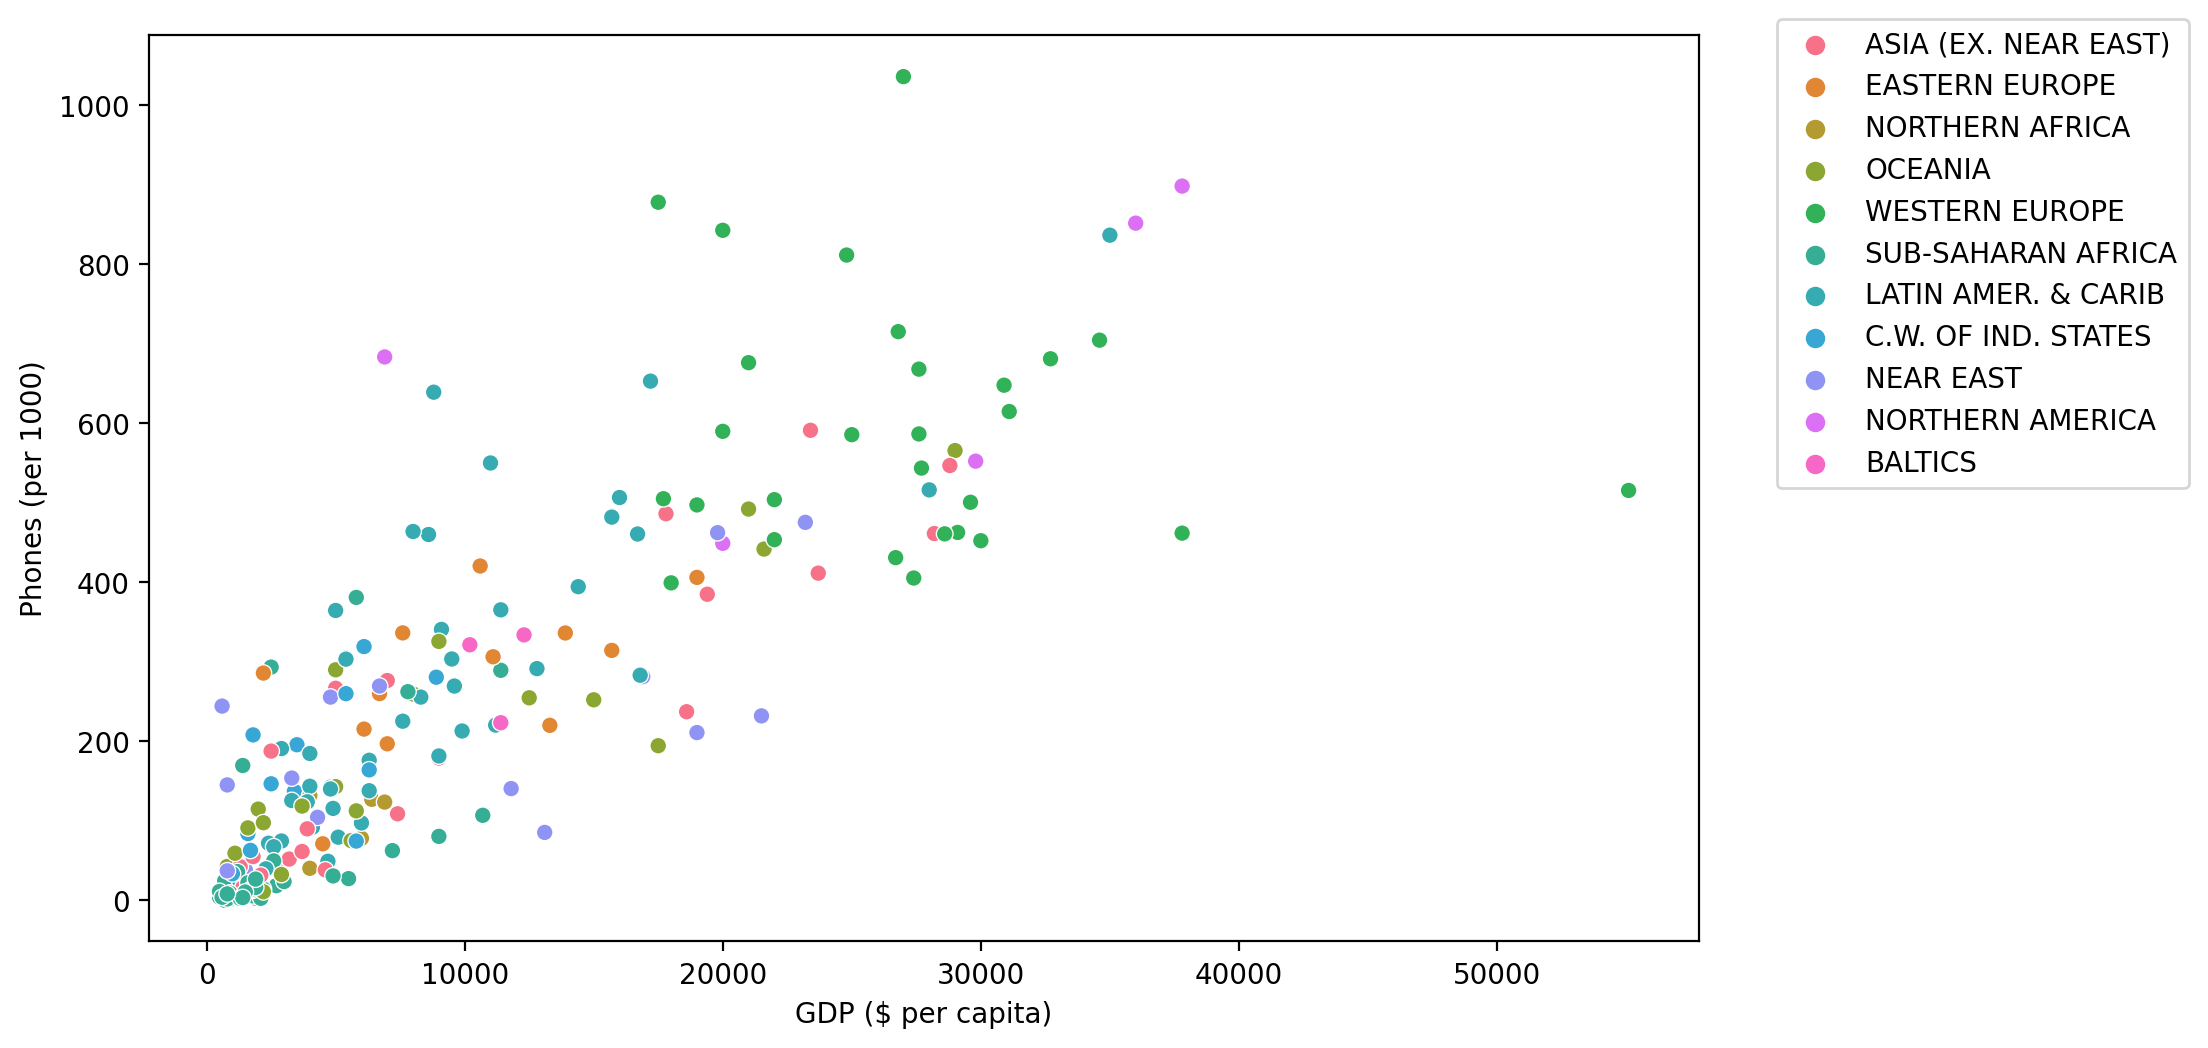

In [7]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

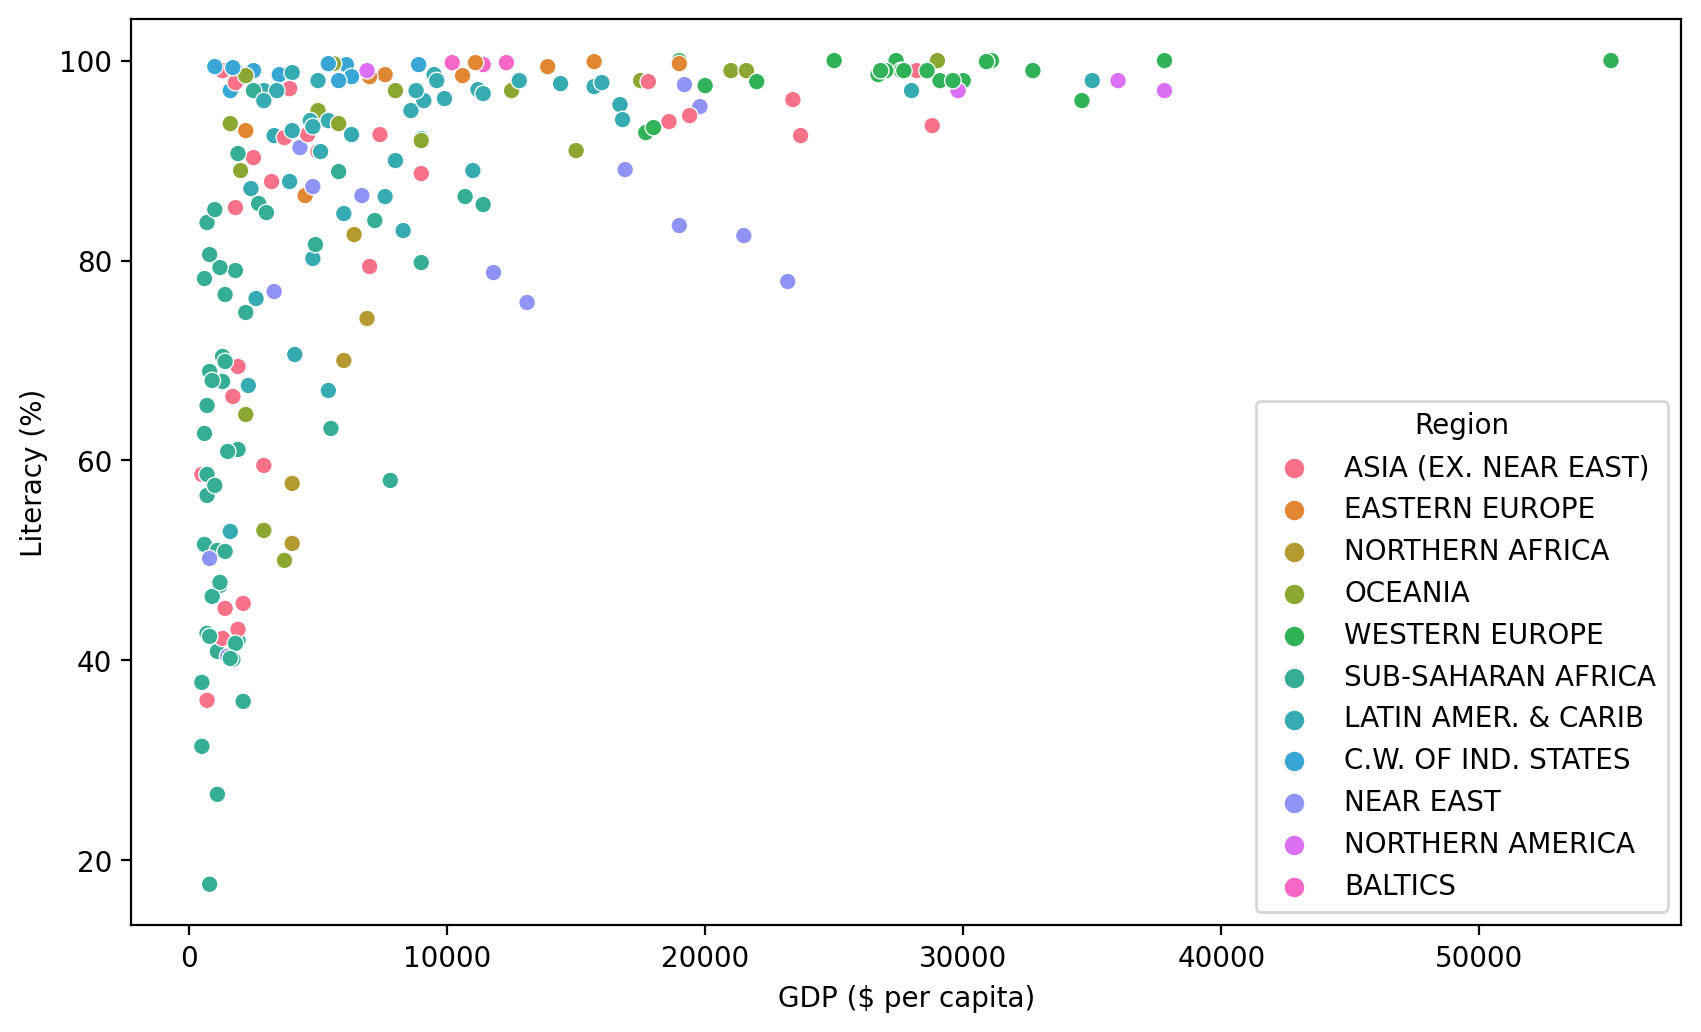

In [8]:
# scatterplot for task 2

plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

<AxesSubplot:>

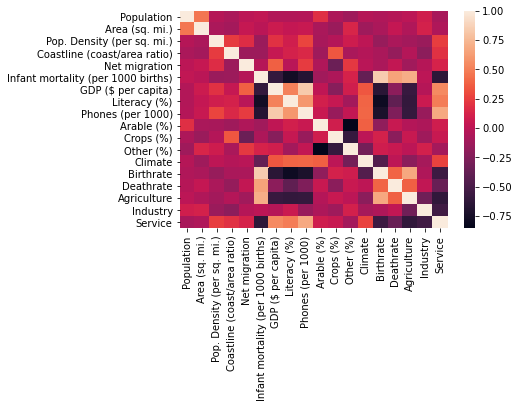

In [9]:
# creating the heatmap for correlations

sns.heatmap(df.corr())

#### Seaborn can perform hierarchal clustering with the clustermap function

+ Creating a clustermap of the correlations between each column using clustermap

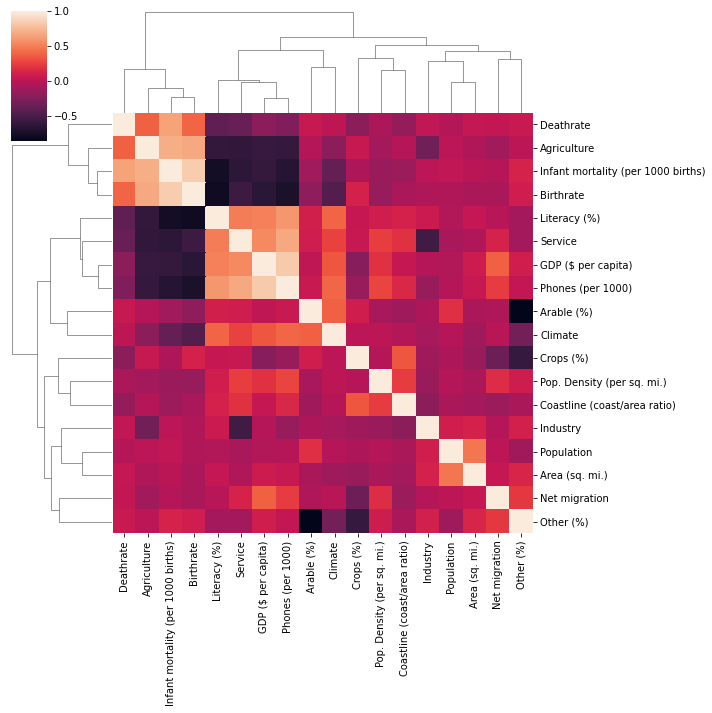

In [10]:
sns.clustermap(df.corr())

## Data Preparation and Model Discovery

#### Missing Data

+ Let's look at the amount of null values per column

In [11]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

### There are 15 countries that have a null value for Agriculture. Let's take a second look to ensure this is correct

In [12]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

#### Observation

+ With the exception of Greenland and Western Sahara, these countries are tiny islands
+ Instead of having a null values, we will replace that with 0

In [13]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [14]:
# now let's see if the Agriculture column reflects this change

df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

### Climate is also missing for a few countries

+ One way to address this problem is by calculating the mean climate for it's region
+ It is not a perfect solution, but it will give us a good indication of the climate
+ After filling the null values, use the .isnull().sum() function to ensure the change is reflected before moving forward

In [15]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [16]:
df.isnull().sum() # looking for that updated climate column, it should go from 18 to 0

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

### Literacy % is another column with over 10 missing values

+ Let's perform the same steps as Climate
+ Calculate the Literacy % for the missing countries by calculating the mean by region
+ Use the .isnull().sum() function to ensure the change is reflected before moving forward

In [17]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [18]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [19]:
df = df.dropna()

## Data Feature Preparation

+ Prepare the data for clustering
+ Use the get_dummies functions to turn non mathetical columns into dummy variables
+ Use the Standard Scaler due to the different types of measurements
+ Create and Fit KMeans Model
+ Model Interpretation

In [20]:
# dropping the column country as it is still a unique identifier

X = df.drop(columns = "Country", axis = 1)

In [21]:
# some categories are categorical strings
# using pandas to create dummy variables

X = pd.get_dummies(X)

In [22]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# there are metrics being measured by percentages meanwhile other metrics are being measured by total counts
# therefore we need to scale the data using sklearn to scale the X feature metrics

from sklearn.preprocessing import StandardScaler

In [24]:
# storing the scaler in a variable

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [25]:
# taking a look at how the scaled X metrics look

scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

## Creating and Fitting Kmeans Model

+ Use a for loop to create and fit several Kmeans models testing anywhere from 2 to 30 models
+ Keep track of the sum of squared distances for each K value
+ Plot it out to create an "elbow" plot of K versus SSD

In [26]:
# importing KMeans with sci-kit learn

from sklearn.cluster import KMeans

In [27]:
# using the for loop to fit several KMeans models (2,30)

ssd = [] # creating an empty list and naming it ssd

# building the for loop
for k in range(2,30):
    model = KMeans(n_clusters = k) # creating a variable and storing KMeans in it, notice the number of clusters is k as it will test 2 to 30 models
    
    model.fit(scaled_X) # fitting the model to the scaled data
    
    ssd.append(model.inertia_) # 

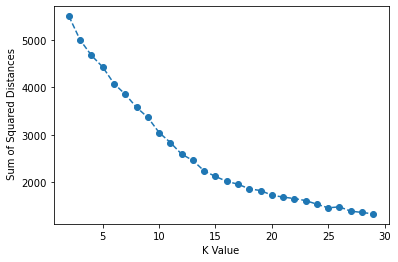

In [28]:
# plotting out the elbow of K vs. SSD

plt.plot(range(2,30),ssd,'o--') # creating the plot and adding the 'o--' as a format to the line graph
plt.xlabel("K Value") # labelling the x-axis
plt.ylabel(" Sum of Squared Distances"); # labelling the y-axis

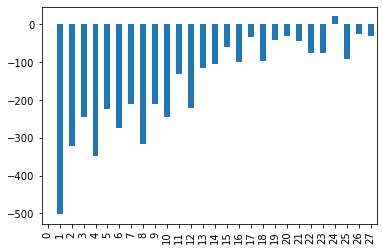

In [29]:
# plotting out a visual to show the sum of squared distances from the previous cluster

pd.Series(ssd).diff().plot(kind='bar');

### Model Interpretation

##### Questions to Answer:

+ What K value is a good choice?
+ Is there more than one good choice?
+ Can we determine which features are more impactful in determining these clusters?
+ Looking at the bar graph, K = 3 has a significant drop off in SSD


In [30]:
# exploring K = 3 and which features are important

model = KMeans(n_clusters = 3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [31]:
# taking a look at the labels

model.labels_

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0])

In [32]:
# storing the model labels under a variable

X['K==3'] = model.labels_

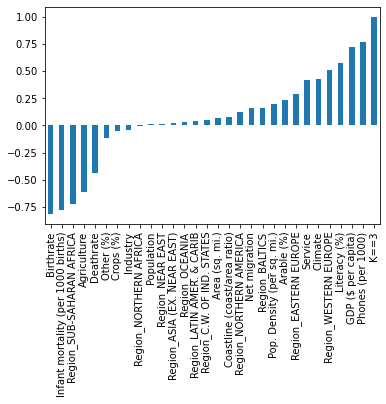

In [33]:
# now looking for the correlations to determine which features had a larger impact in determining the clusters
# putting into a bar plot for better visualization

X.corr()['K==3'].sort_values().plot(kind = 'bar');

### Takeaways from Correlation:

+ Latin America and the Caribbean had a strong impact in determining these clusters
+ The model seems to be picking clusters on other features such as:
  + Literacy %
  + Crops
  + Death Rate
  + Countries in Latin America and the Caribbean and Sub-Saharan Africa
  
+ Though the visual helps understand the model, it is still difficult to read, there is a Geographical Model Interpretation that can provide a better visual and story for the clustering

In [34]:
# reading in the csv iso codes

iso = pd.read_csv('data/country_iso_codes.csv')

In [35]:
iso

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [36]:
# mapping the country to the correct iso code in a dictionary

iso_mapping = iso.set_index('Country')['ISO Code'].to_dict()

In [37]:
iso_mapping # looking at the iso_mapping dictionary

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [38]:
# creating a new column called ISO Code on the dataframe and is mapped from the iso_mapping dictionary

df['ISO Code'] = df['Country'].map(iso_mapping)

In [39]:
# taking a look at the dataframe to ensure the ISO Codes were mapped accurately

df.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND


In [40]:
# creating a new column called Cluster, where the unsupervised KMeans labels will be added
# this is crucial to adding a map of the world that is being split up and visualized by the label itself

df['Cluster'] = model.labels_

In [41]:
# importing plotly to import the built-in country and state geometries
# plotly does not require an external GeoJSON file

import plotly.express as px

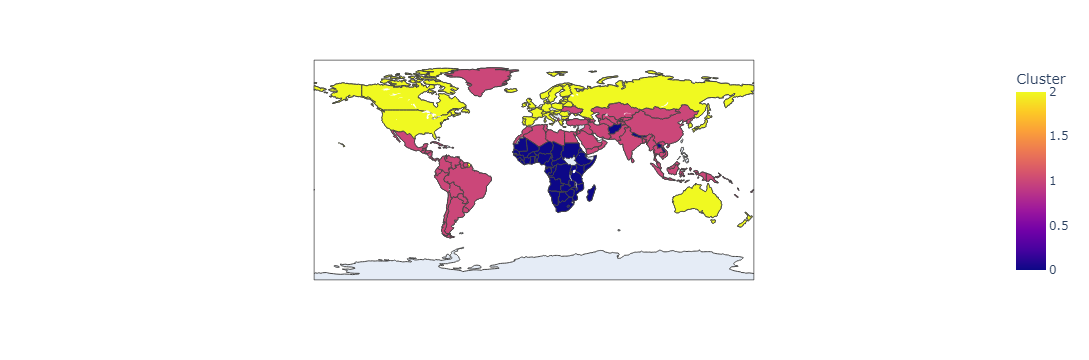

In [44]:
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country", # column to add to hover information
                    # color_continuous_scale='Turbo'
                    )
fig.show()

### Key Takeaways by now looking at the GeoMap:

+ The three labels seem to be based on: First World Democracies (Minus South Africa), Sub-Saharan Africa, and then the Rest of the World
+ Literacy, Agriculture and Infant Mortality Rate had an impact on the way the labels w
+ This also helps to explain why GDP played a role in labelling